Online payment is the most popular transaction method in the world today. However, with an increase in online payments also comes a rise in payment fraud. The objective of this study is **to identify fraudulent and non-fraudulent payments**. The dataset is collected from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments. 


The dataset consists of 10 variables:
* **step**: represents a unit of time where 1 step equals 1 hour
* **type**: type of online transaction
* **amount**: the amount of the transaction
* **nameOrig**: customer starting the transaction
* **oldbalanceOrg**: balance before the transaction
* **newbalanceOrig**: balance after the transaction
* **nameDest**: recipient of the transaction
* **oldbalanceDest**: initial balance of recipient before the transaction
* **newbalanceDest**: the new balance of recipient after the transaction
* **isFraud**: fraud transaction

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import random
import tensorflow as tf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# <div style='background:darkblue'>  <font color='white'> <b>&nbsp;Exploratory Data Analysis</b></font> </div>

In [3]:
df = pd.read_csv(r"C:\Users\Gaurav Pandey\Downloads\onlinefraud.csv")

df.drop('isFlaggedFraud', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


* The dataset consists of 6,362,620 observations.

In [45]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,quantity,oldbalanceOrg_amt,oldbalanceDest_amt
0,1,0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,very low,very low,very low
1,1,0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,very low,very low,very low
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,very low,very low,very low
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,very low,very low,very low
4,1,0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,very low,very low,very low


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

* There are no missing values.

In [6]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
] 

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='github',
        numalign='right'
    )
)

|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |           0 | 9.24455e+07 |
|  1 | oldbalanceOrg  |           0 |  5.9585e+07 |
|  2 | newbalanceOrig |           0 |  4.9585e+07 |
|  3 | oldbalanceDest |           0 | 3.56016e+08 |
|  4 | isFraud        |           0 |           1 |


In [7]:
# Downcast numerical columns with smaller dtype
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

# Use category dtype for categorical column
df['type'] = df['type'].astype('category')

In [8]:
# Check duplicate values
df.duplicated().sum()

np.int64(0)

* There are no duplicate values.

In [9]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,6)

<h2>
    <div style='background:steelblue'> 
    <font color='white'>
    <b>&nbsp; Univariate data visualization</b>
    </font>
    </div>
</h2>

In [10]:
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
706        4
721        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

* There are **743** steps, and every step has **at least 2** occurrences.

C:\Users\Gaurav Pandey\AppData\Local\Temp\ipykernel_24480\3874918745.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, palette='PuBu')
C:\Users\Gaurav Pandey\AppData\Local\Temp\ipykernel_24480\3874918745.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')


Text(0, 0.5, 'Number of transactions')

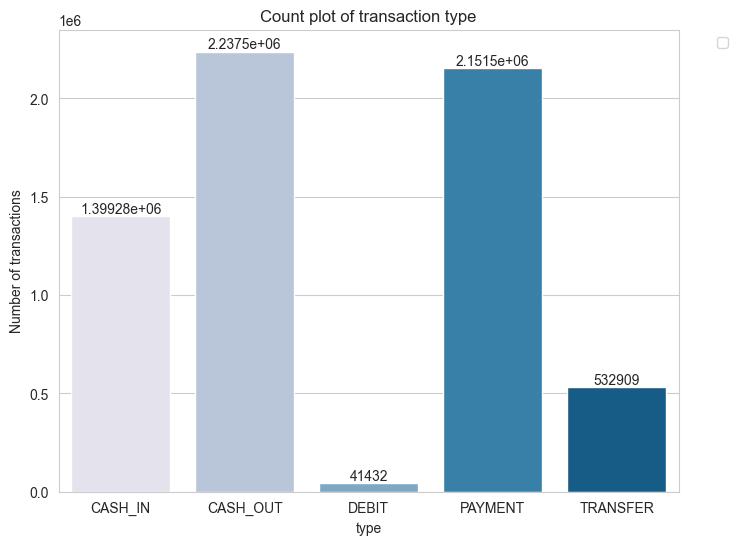

In [11]:
ax = sns.countplot(x='type', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

* **Cash out** is **the most numerous** transaction type, followed by payment, cash in, transfer and debit types.

Text(0.5, 1.0, 'Distribution of transaction amount')

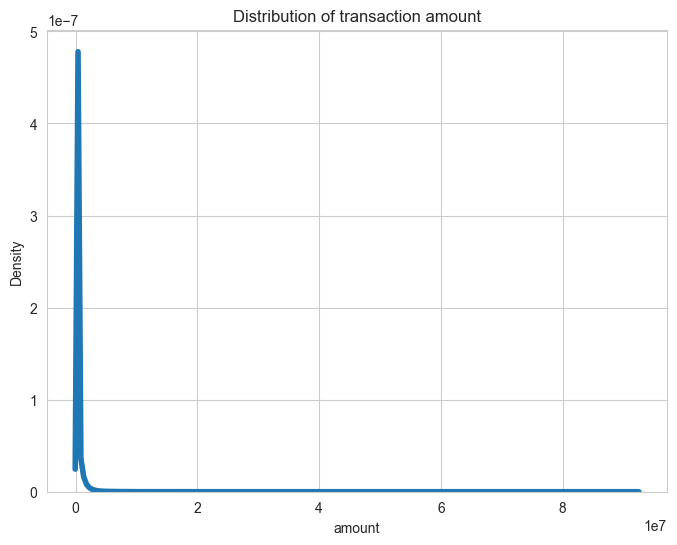

In [12]:
sns.kdeplot(df['amount'], linewidth=4)
plt.title('Distribution of transaction amount')

* The distribution of transaction amounts is **right skewed**. 
* This indicates that most values are clustered around the left tail of the distribution, with the longer right tail. 
* (mode < median < mean)

In [13]:
df['nameOrig'].value_counts()

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
              ..
C1970706589    1
C40604503      1
C1614818636    1
C2089752665    1
C154988899     1
Name: count, Length: 6353307, dtype: int64

* There are **6353307** initial customers, and every step has **at least 1** occurrence.

Text(0.5, 1.0, 'Distribution of transaction amount')

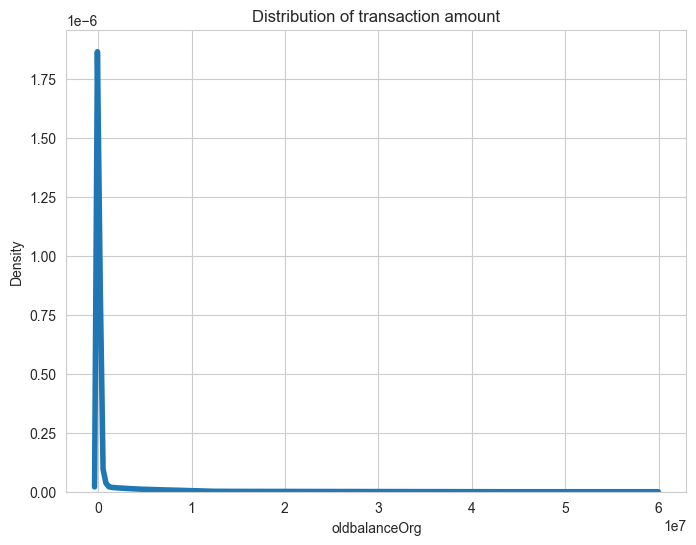

In [14]:
sns.kdeplot(df['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

* The distribution of pre-transaction balances of the initial customers is **right skewed**.

Text(0.5, 1.0, 'Distribution of transaction amount')

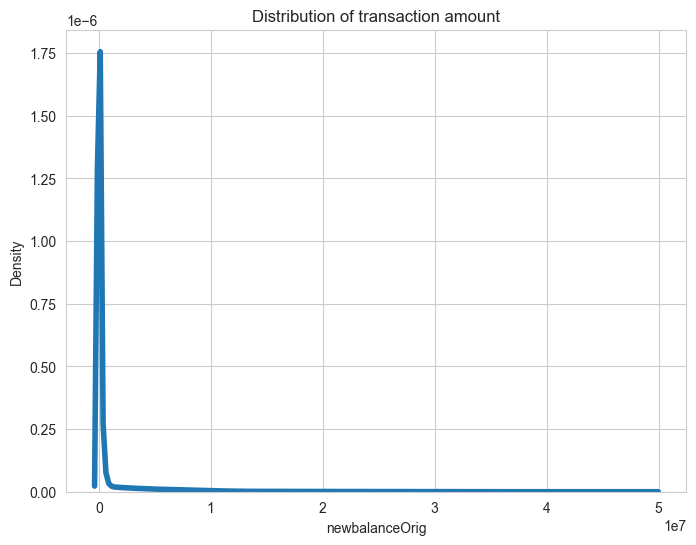

In [15]:
sns.kdeplot(df['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')

* The distribution of post-transaction balances of the initial customers is **right skewed**.

In [16]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
C1049862186      1
C2118381511      1
C2099952089      1
C1027984317      1
C1251365829      1
Name: count, Length: 2722362, dtype: int64

* There are **2722362** recipients, and every step has **at least 1** occurrence.

Text(0.5, 1.0, 'Distribution of transaction amount')

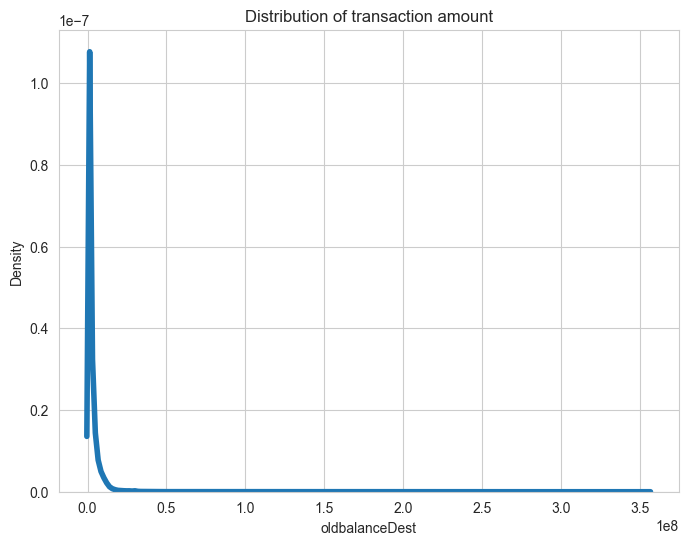

In [17]:
sns.kdeplot(df['oldbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

* The distribution of pre-transaction balances of the recipient is **right skewed**.

Text(0.5, 1.0, 'Distribution of transaction amount')

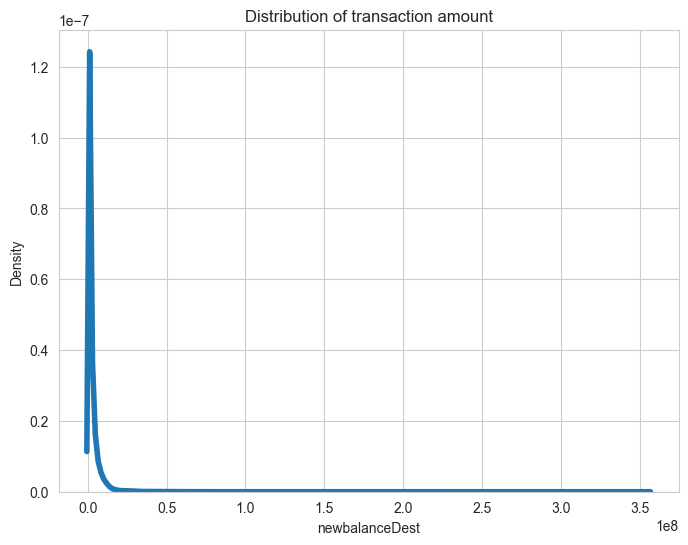

In [18]:
sns.kdeplot(df['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount') #run krna hai

* The distribution of post-transaction balances of the recipient is **right skewed**.

C:\Users\Gaurav Pandey\AppData\Local\Temp\ipykernel_24480\80623673.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='isFraud', data=df, palette='PuBu')


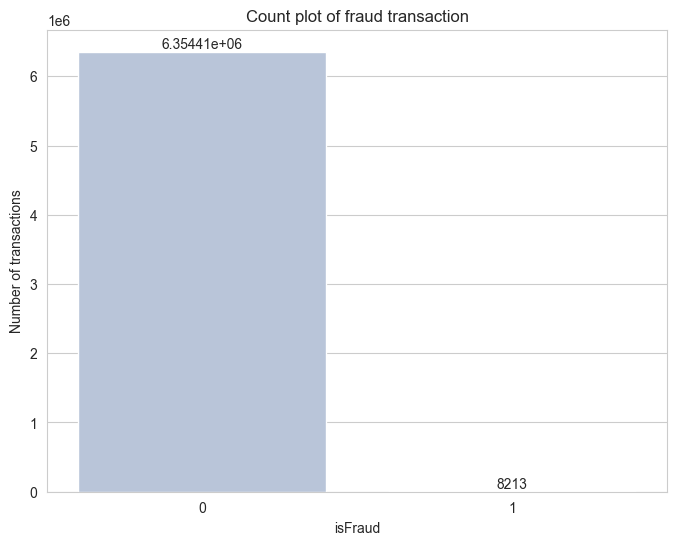

In [19]:
ax = sns.countplot(x='isFraud', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

* There are much **more non-fraudulent transactions** than fraudulent transactions.

<h2>
    <div style='background:steelblue'> 
    <font color='white'>
    <b>&nbsp; Bivariate data visualization</b>
    </font>
    </div>
</h2>

C:\Users\Gaurav Pandey\AppData\Local\Temp\ipykernel_24480\3891187721.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby(['type', 'isFraud']).size().unstack()


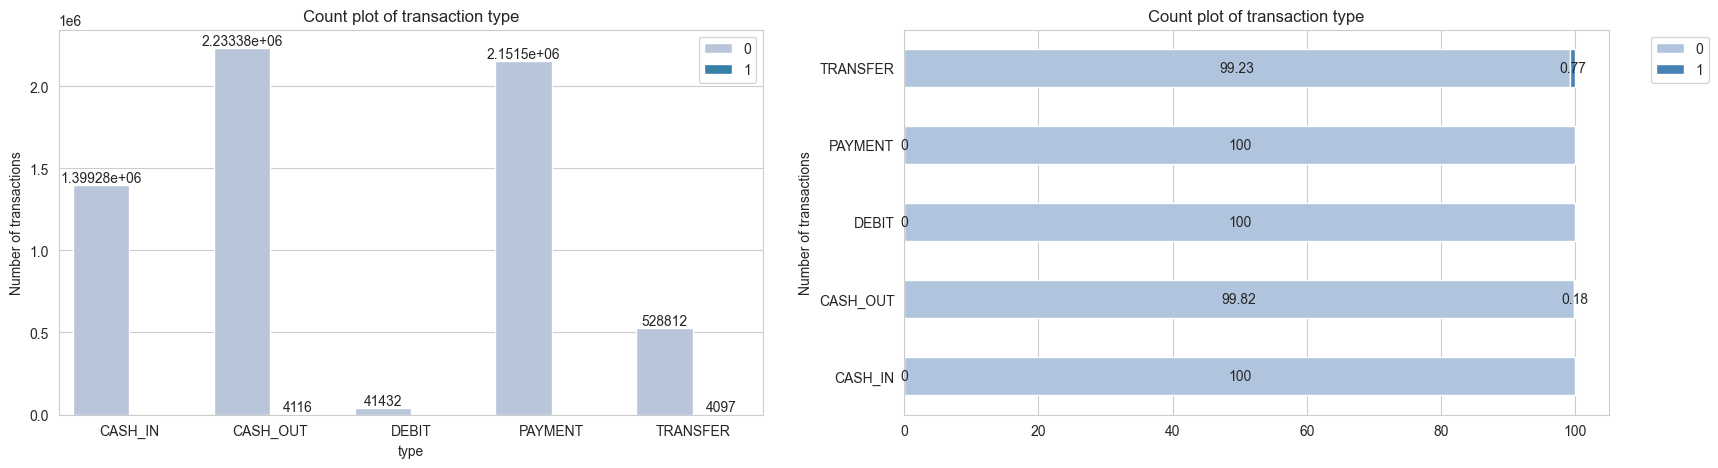

In [20]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

* Fraudulent transactions only occur in debit and transfer types.

Text(0, 0.5, 'Number of transactions')

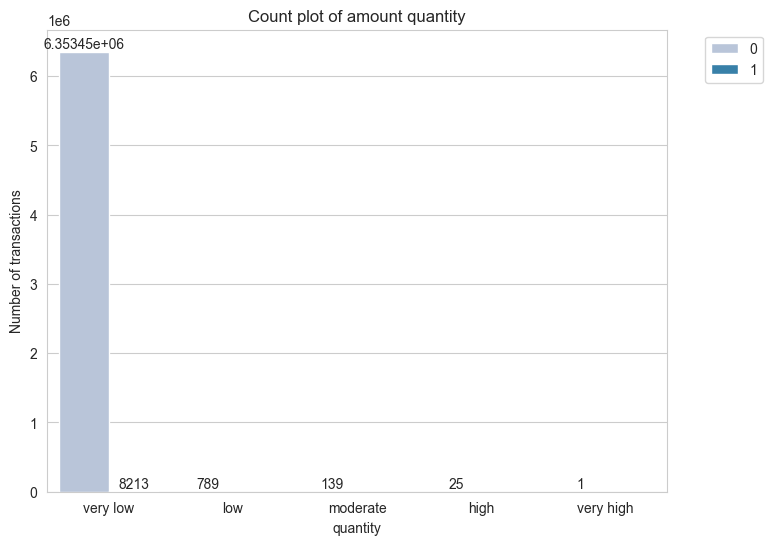

In [21]:
df['quantity'] = pd.cut(df['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

* All fraudulent transactions fall into the category of very low amounts. 
* This suggests that in most cases, small transactions are more prone to fraudulent transactions.

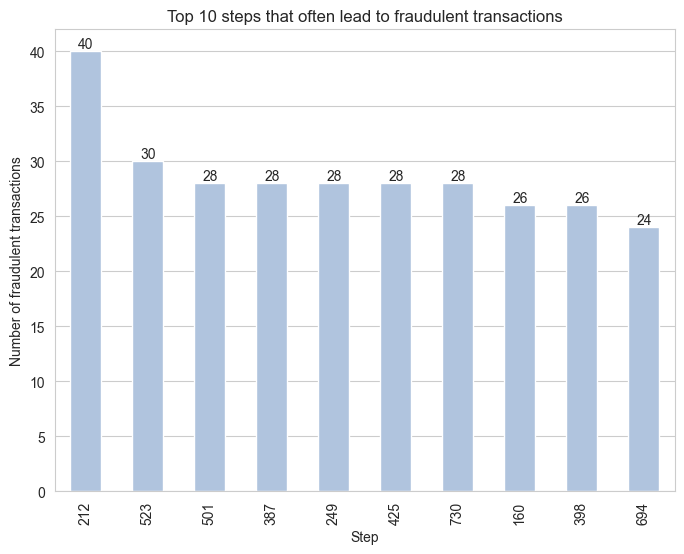

In [22]:
df1 = df[df['isFraud']==1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, df2

* **Step 212** has the highest number of fraudulent transactions, 40 cases. 
* This indicates that Step 212 is the step that will most likely lead to fraudulent transactions.

Text(0.5, 0, 'Initial customers pre-transaction balance amount')

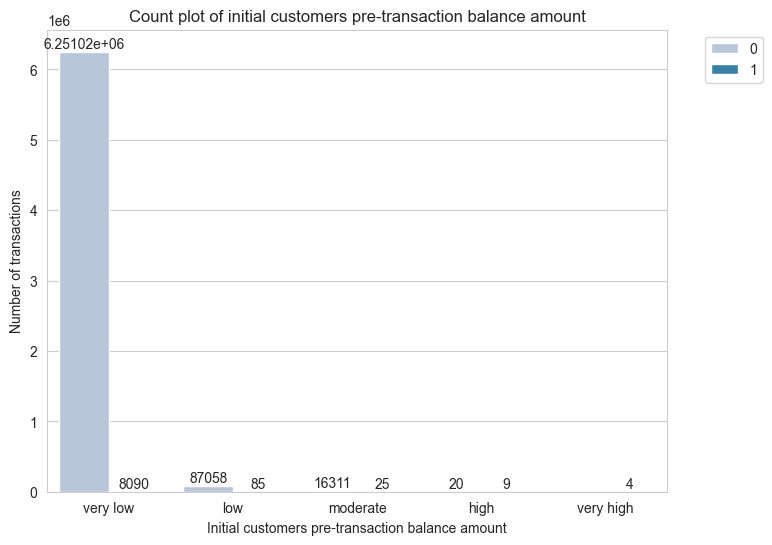

In [23]:
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

* Initial customers with **very low pre-transaction balances** has the highest number of fraudulent transactions. 
* This means that initial customers with very low pre-transaction balances may be more likely to fall for a fraudulent transaction.

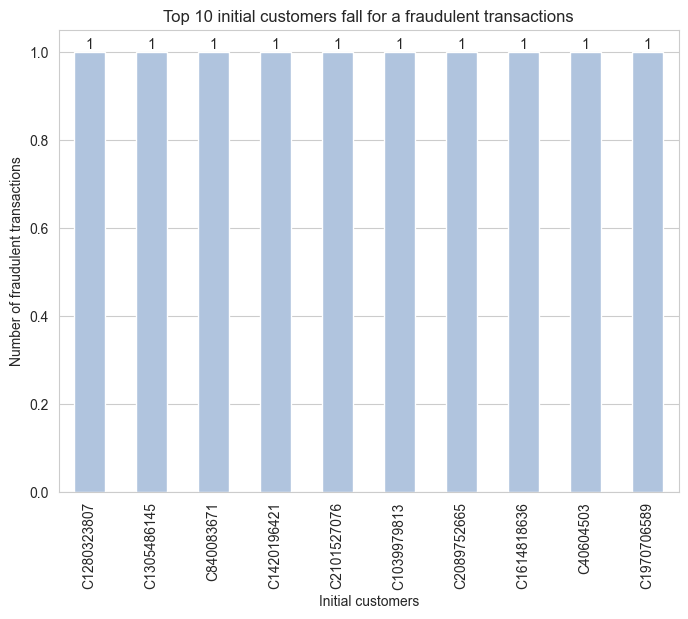

In [24]:
df2 = df1['nameOrig'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, df2

* Initial customers are scammed of **at most one** for a fraudulent transaction.

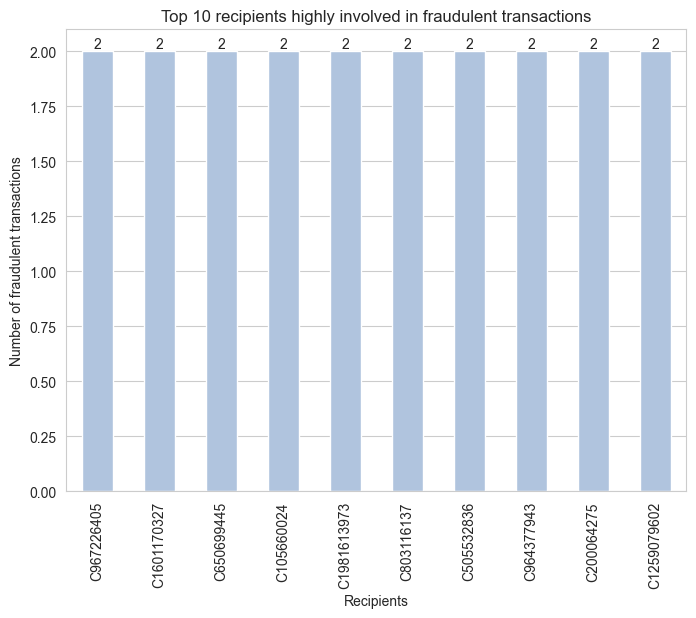

In [25]:
df2 = df1['nameDest'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')

del ax, df2

* Suspicious recipients only have a **maximum of 2** involved fraudulent transactions.

Text(0.5, 0, 'Recipient pre-transaction balance amount')

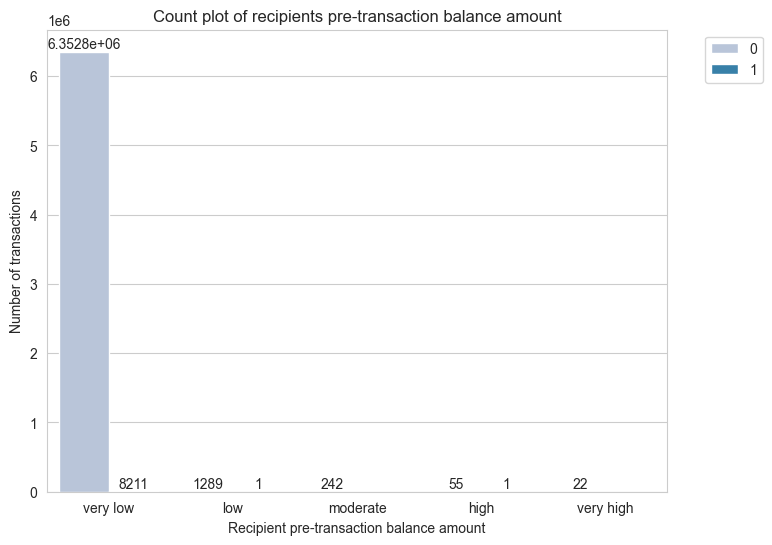

In [26]:
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

* Recipients with **very low pre-transaction balances** has the highest number of fraudulent transactions. 
* This implies that recipients with very low pre-transaction balances may be more susceptible to fraudulent transactions.

<h2>
    <div style='background:steelblue'> 
    <font color='white'>
    <b>&nbsp; Multivariate data visualization</b>
    </font>
    </div>
</h2>

Text(0.5, 1.0, 'Correlation')

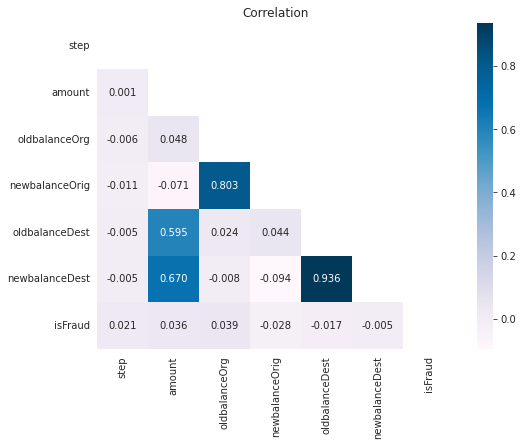

In [26]:
corr_matrix = df.corr('spearman')
sns.heatmap(corr_matrix, cbar=True, annot=True, mask = np.triu(np.ones_like(corr_matrix, dtype = bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')

* oldbalanceOrg and newbalanceOrig has **strong positive** relationship. 
* oldbalanceDest and newbalanceDest has **strong positive** relationship.
* oldbalanceOrg and amount has **weak positive** relationship.
* newbalanceOrig and amount has **moderate positive** relationship.

# <div style='background:darkblue'> <font color='white'> <b>&nbsp; Model Building</b> </font> </div>

In [27]:
# Data preprocessing
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

Due to the large dataset, Random Forest and Logistic Regression with balanced class weight are used to identify online payment fraud.

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay


seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


X = df.copy()
X.drop(['nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest', 'quantity', 'oldbalanceOrg_amt', 'oldbalanceDest_amt'], axis=1, inplace=True)
y = X.pop('isFraud')


# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)


X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

In [48]:
df.tail(25)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,quantity,oldbalanceOrg_amt,oldbalanceDest_amt
6362595,741,3,144945.34,C1092829426,144945.34,0.0,C716019997,0.00,144945.34,1,very low,very low,very low
6362596,741,4,48442.88,C1112979339,48442.88,0.0,C2114078084,0.00,0.00,1,very low,very low,very low
6362597,741,3,48442.88,C1706094385,48442.88,0.0,C2109905271,513746.19,562189.07,1,very low,very low,very low
6362598,742,4,4009058.39,C1044665079,4009058.39,0.0,C750074708,0.00,0.00,1,very low,very low,very low
6362599,742,3,4009058.39,C1970706589,4009058.39,0.0,C637394241,1229761.96,5238820.34,1,very low,very low,very low
6362600,742,4,652993.91,C40604503,652993.91,0.0,C1166857907,0.00,0.00,1,very low,very low,very low
6362601,742,3,652993.91,C1614818636,652993.91,0.0,C362803701,0.00,652993.91,1,very low,very low,very low
6362602,742,4,1819543.69,C2089752665,1819543.69,0.0,C112833674,0.00,0.00,1,very low,very low,very low
6362603,742,3,1819543.69,C1039979813,1819543.69,0.0,C2078394828,0.00,1819543.69,1,very low,very low,very low
6362604,742,4,54652.46,C1674778854,54652.46,0.0,C1930074465,0.00,0.00,1,very low,very low,very low


In [37]:
def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))
        
        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
        
        for score in scoring:
            scores = cross_val_score(model, X, y, scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))
            
        print('\n')

In [38]:
classifiers = { 'Random Forest Classifier':RandomForestClassifier(class_weight='balanced', random_state=seed),
                'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=seed)
              }

In [39]:
model_comparison_evaluate(classifiers, X_train, y_train)

K-Fold Cross-Validation:

Random Forest Classifier:
Mean accuracy score: 0.985 (0.003)
Mean precision score: 0.975 (0.006)
Mean recall score: 0.996 (0.002)
Mean f1 score: 0.985 (0.003)
Mean roc_auc score: 0.998 (0.000)


Logistic Regression:
Mean accuracy score: 0.848 (0.007)
Mean precision score: 0.843 (0.008)
Mean recall score: 0.856 (0.005)
Mean f1 score: 0.849 (0.006)
Mean roc_auc score: 0.927 (0.004)




Random Forest Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       0.98      1.00      0.99   1239159
    Fraud [1]       1.00      0.05      0.09     33365

     accuracy                           0.98   1272524
    macro avg       0.99      0.52      0.54   1272524
 weighted avg       0.98      0.98      0.96   1272524
 



Text(0.5, 0, 'False Positive Rate')

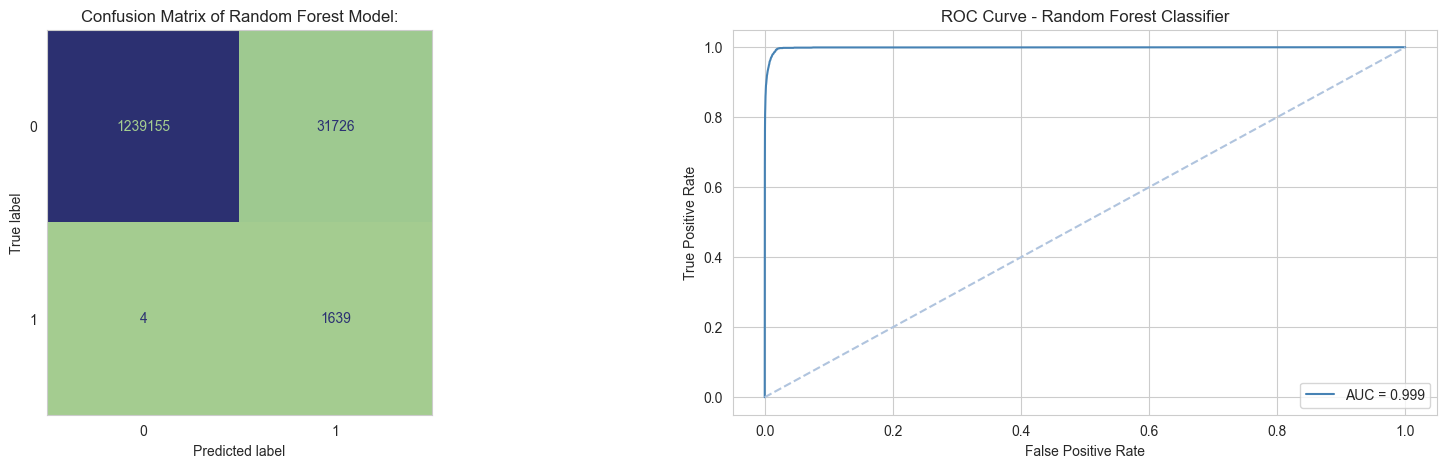

In [40]:
model = RandomForestClassifier(class_weight='balanced', random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)[:,1]
print('Random Forest Classifier:')
print(classification_report(y_pred, y_test, labels=[0,1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')



fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)



fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)                       
ax[1].set_title('ROC Curve - Random Forest Classifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

In [42]:
import pickle

filename = 'newmkc.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)
print(f'Model saved as {filename}')

Model saved as newmkc.pkl


* From the confusion matrix, 1,239,155 were correctly classified as non-fraudulent payments, and 31,726 people were misclassified as non-fraudulent payments.
* According to the confusion matrix, 1,639 payments were incorrectly labelled as fraud while 4 payments were correctly identified as fraud.

# <div style='background:darkblue'>  <font color='white'> <b>&nbsp; Conclusion</b> </font> </div>

* Random Forest obtains the highest score of all using K-fold cross-validation.
* The best performing model is **Random Forest** for identifying fraudulent and non-fraudulent payments, as the AUC is 0.999, which is close to 1. This means it has a good separability measure, and the model has an 99.9% chance of being able to distinguish between positive and negative classes..